In [1]:
# from phidl import Device, quickplot as qp
# import phidl.routing as pr
# import numpy as np
# D = Device()
# port1 = D.add_port(name='C1', midpoint=(0, 35), width=4, orientation=90)
# port2 = D.add_port(name='C2', midpoint=(2, 15), width=4, orientation=270)
# dot = np.dot(port1.normal, port2.normal.T)
# print(np.intersect1d(port1.normal, port2.normal))
# if round((dot[0,0] + dot[1,1]) - (dot[1,0] + dot[0,1])) != 0:
#     D.add_ref(pr.route_smooth(port1, port2, path_type='C'))
#     qp(D)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from simphony.libraries import siepic
from simphony.simulation import Simulation, Laser, Detector

In [1]:
def ring_factory(radius):
  """Creates a full ring (with terminator) from a half ring.

  Resulting pins are ('pass', 'in', 'out').

  Parameters
  ----------
  radius : float
      The radius of the ring resonator, in meters.
  """
  # Have rings for selecting out frequencies from the data line.
  # See SiPANN's model API for argument order and units.
  halfring1 = siepic.HalfRing(radius=radius)
  halfring2 = siepic.HalfRing(radius=radius)
  terminator = siepic.Terminator()
  return (halfring1, halfring2, terminator)

def connect_rings(halfring1, halfring2, terminator):
  halfring1.rename_pins("midb", "pass", "midt", "in")
  halfring2.rename_pins("midt", "out", "midb", "term")

  # the interface method will connect all of the pins with matching names
  # between the two components together
  halfring1.interface(halfring2)
  halfring2["term"].connect(terminator)

  # bundling the circuit as a Subcircuit allows us to interact with it
  # as if it were a component
  return halfring1.circuit.to_subcircuit()

In [4]:
wg_input = siepic.Waveguide(name="wginput", length=100e-6)
wg_out1 = siepic.Waveguide(name="wgoutput1", length=100e-6)
wg_connect1 = siepic.Waveguide(name="wgc1", length=100e-6)
wg_out2 = siepic.Waveguide(name="wg_output2", length=100e-6)
wg_connect2 = siepic.Waveguide(name="wg_c2", length=100e-6)
wg_out3 = siepic.Waveguide(name="wg_output3", length=100e-6)
terminator = siepic.Terminator(name="term")

ring1 = ring_factory(10e-6)
ring1.name = "ring1"
ring2 = ring_factory(11e-6)
ring2.name = "ring2"
ring3 = ring_factory(12e-6)
ring3.name = "ring3"

C:\Users\s39chand\AppData\Roaming\Python\Python310\site-packages\simphony\libraries\siepic\__init__.py:441: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 3e-08, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
NOTE: Model attributes may have been automatically modified.
  warnings.warn(msg, UserWarning)
C:\Users\s39chand\AppData\Roaming\Python\Python310\site-packages\simphony\libraries\siepic\__init__.py:441: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 3e-08, 'radius': 1.1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'th

In [5]:
ring1.multiconnect(wg_connect1, wg_input["pin2"], wg_out1)
ring2.multiconnect(wg_connect2, wg_connect1, wg_out2)
ring3.multiconnect(terminator, wg_connect2, wg_out3)

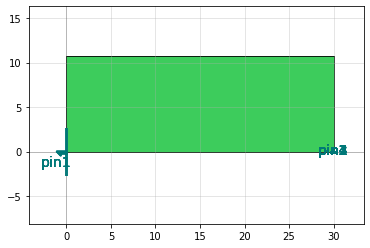

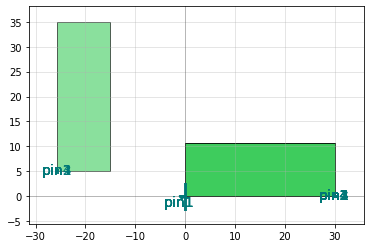

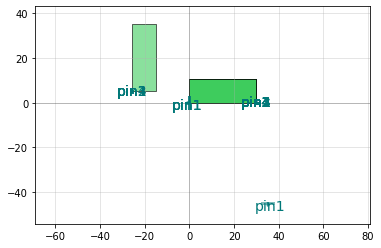

At waveguide
At waveguide
At waveguide


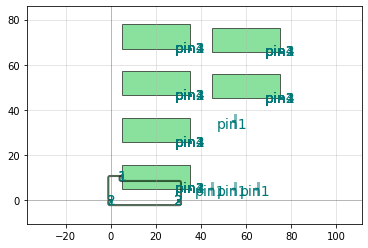

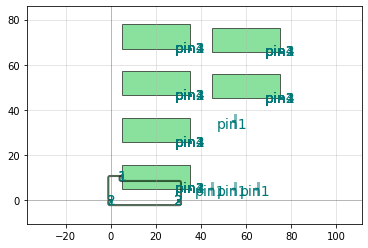

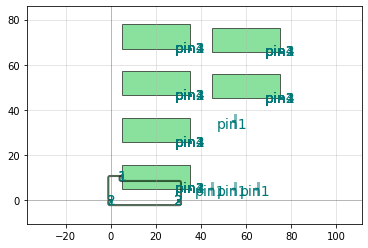

At waveguide


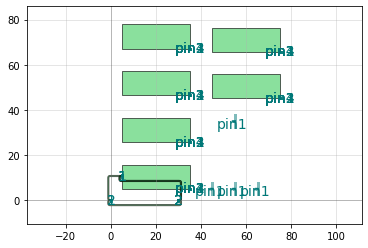

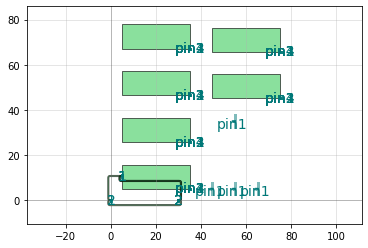

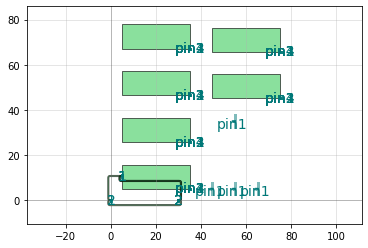

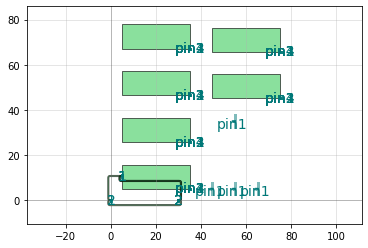

All connected


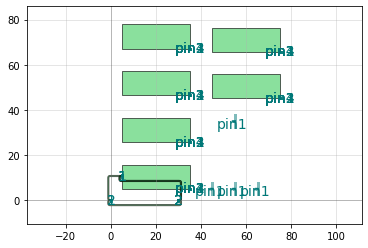

C:\Users\s39chand\AppData\Roaming\Python\Python310\site-packages\simphony\libraries\siepic\__init__.py:441: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 1e-07, 'radius': 1e-05, 'width': 4.990681808637543e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
NOTE: Model attributes may have been automatically modified.
  warnings.warn(msg, UserWarning)
C:\Users\s39chand\AppData\Roaming\Python\Python310\site-packages\simphony\libraries\siepic\__init__.py:441: UserWarning: Exact parameters not available for '<class 'simphony.libraries.siepic.HalfRing'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.1906818086375433e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius

ValueError: [DEVICE] add_port() error: Port name "pin2" already exists in this Device (name "rect", uid 72)

In [6]:
with Simulation() as sim:
    l = Laser()
    l.freqsweep(3e8/1600e-6, 3e8/1500e-6)
    l.connect(wg_input)
    d = Detector().connect(wg_out1)

    data = sim.layout_aware_simulation()


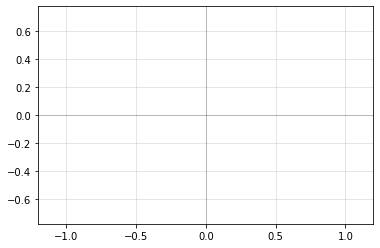

In [ ]:
from phidl import Device
D = Device(aliases="asdf")
D.add_label()
from phidl import quickplot, set_quickplot_options
set_quickplot_options(label_aliases=True)
quickplot(D)